![image.png](attachment:image.png)

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

# Juan David Anzola R

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado, las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


# **1. Análisis exploratorio de los datos (EDA)**

In [1]:
# importar dependecias
from google.colab import drive
import zipfile
import os
import gzip
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Conectar con Google Drive
drive.mount('/content/drive')

# Definir las rutas
zip_path = '/content/drive/MyDrive/MASTER_AI/Lab II/covertype.zip'
extract_path = '/content/drive/MyDrive/MASTER_AI/Lab II/covertype_extracted'

# Crear el directorio de destino si no existe
os.makedirs(extract_path, exist_ok=True)

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracción completada.")

# Listar los archivos extraídos para verificar
!ls /content/drive/MyDrive/MASTER_AI/Lab\ II/covertype_extracted

# Ruta al archivo .gz extraído
gz_path = '/content/drive/MyDrive/MASTER_AI/Lab II/covertype_extracted/covtype.data.gz'

# Leer el archivo .gz directamente en un DataFrame
with gzip.open(gz_path, 'rt') as f:
    df = pd.read_csv(f, header=None)

# Definir los nombres de las columnas
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Agregar columnas de Wilderness_Area (4 columnas binarias)
for i in range(4):
    column_names.append(f'Wilderness_Area_{i+1}')

# Agregar columnas de Soil_Type (40 columnas binarias)
for i in range(40):
    column_names.append(f'Soil_Type_{i+1}')

# Agregar la columna de Cover_Type (variable objetivo)
column_names.append('Cover_Type')

# Asignar los nombres de las columnas al DataFrame
df.columns = column_names



Mounted at /content/drive
Extracción completada.
covtype.data.gz  covtype.info  old_covtype.info


In [3]:
# Mostrar las primeras filas del DataFrame para verificar
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


¿Cuántas instancias de datos tiene el dataset?

In [4]:
df.shape
Markdown(f"""
### Instancias y varibales
{df.shape}
""")


### Instancias y varibales
(581012, 55)


¿Cuántas variables continuas hay en el dataset?

In [5]:
# Obtener la lista de columnas y sus tipos de datos
columnas = df.columns.tolist()
listacol = [(col, df[col].dtype) for col in columnas]

# Crear un DataFrame con la lista de columnas y tipos de datos
df_info = pd.DataFrame(listacol, columns=['Column Name', 'Data Type'])

# Convertir df_info a formato Markdown
df_info_markdown = df_info[['Column Name', 'Data Type']].to_markdown(index=False)

Markdown(f"""
### Tipo de datos de las variables
{df_info_markdown}
""")


### Tipo de datos de las variables
| Column Name                        | Data Type   |
|:-----------------------------------|:------------|
| Elevation                          | int64       |
| Aspect                             | int64       |
| Slope                              | int64       |
| Horizontal_Distance_To_Hydrology   | int64       |
| Vertical_Distance_To_Hydrology     | int64       |
| Horizontal_Distance_To_Roadways    | int64       |
| Hillshade_9am                      | int64       |
| Hillshade_Noon                     | int64       |
| Hillshade_3pm                      | int64       |
| Horizontal_Distance_To_Fire_Points | int64       |
| Wilderness_Area_1                  | int64       |
| Wilderness_Area_2                  | int64       |
| Wilderness_Area_3                  | int64       |
| Wilderness_Area_4                  | int64       |
| Soil_Type_1                        | int64       |
| Soil_Type_2                        | int64       |
| Soil_Type_3                        | int64       |
| Soil_Type_4                        | int64       |
| Soil_Type_5                        | int64       |
| Soil_Type_6                        | int64       |
| Soil_Type_7                        | int64       |
| Soil_Type_8                        | int64       |
| Soil_Type_9                        | int64       |
| Soil_Type_10                       | int64       |
| Soil_Type_11                       | int64       |
| Soil_Type_12                       | int64       |
| Soil_Type_13                       | int64       |
| Soil_Type_14                       | int64       |
| Soil_Type_15                       | int64       |
| Soil_Type_16                       | int64       |
| Soil_Type_17                       | int64       |
| Soil_Type_18                       | int64       |
| Soil_Type_19                       | int64       |
| Soil_Type_20                       | int64       |
| Soil_Type_21                       | int64       |
| Soil_Type_22                       | int64       |
| Soil_Type_23                       | int64       |
| Soil_Type_24                       | int64       |
| Soil_Type_25                       | int64       |
| Soil_Type_26                       | int64       |
| Soil_Type_27                       | int64       |
| Soil_Type_28                       | int64       |
| Soil_Type_29                       | int64       |
| Soil_Type_30                       | int64       |
| Soil_Type_31                       | int64       |
| Soil_Type_32                       | int64       |
| Soil_Type_33                       | int64       |
| Soil_Type_34                       | int64       |
| Soil_Type_35                       | int64       |
| Soil_Type_36                       | int64       |
| Soil_Type_37                       | int64       |
| Soil_Type_38                       | int64       |
| Soil_Type_39                       | int64       |
| Soil_Type_40                       | int64       |
| Cover_Type                         | int64       |


In [6]:
# Definir los nombres de las columnas
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Agregar columnas de Wilderness_Area (4 columnas binarias)
for i in range(4):
    column_names.append(f'Wilderness_Area_{i+1}')

# Agregar columnas de Soil_Type (40 columnas binarias)
for i in range(40):
    column_names.append(f'Soil_Type_{i+1}')

# Agregar la columna de Cover_Type (variable objetivo)
column_names.append('Cover_Type')

# Asignar los nombres de las columnas al DataFrame
df.columns = column_names

# Listas de variables continuas y categóricas
continuous_vars = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
categorical_vars = [col for col in df.columns if col.startswith('Wilderness_Area') or col.startswith('Soil_Type')] + ['Cover_Type']

Markdown(f"""
### Variables continuas
- **El # de variables continuas es:** {len(continuous_vars)}
- **Las variables continuas son:** {(continuous_vars)}
""")


### Variables continuas
- **El # de variables continuas es:** 10
- **Las variables continuas son:** ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

In [7]:
Markdown(f"""
### Variables categóricas
- **El # de variables categóricas es:** {len(categorical_vars)}
- **Las variables continuas son:** {(categorical_vars)}
""")


### Variables categóricas
- **El # de variables categóricas es:** 45
- **Las variables continuas son:** ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type']


¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df['Cover_Type']

,Cover_Type
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


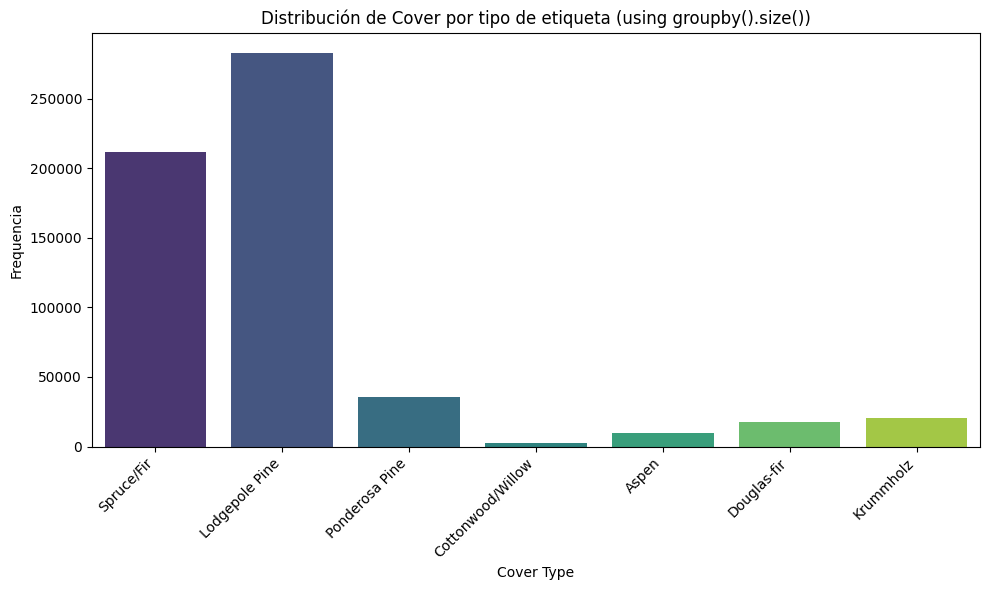

In [10]:
#para saber la distribución del dataset para la variable objetivo

# agrupar la vriable Cover_Type y contar cada clase
class_counts = df.groupby('Cover_Type').size()

# listar las clases
class_labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

# Crear el DataFrame
plot_df = pd.DataFrame({'Cover Type': class_counts.index, 'Count': class_counts.values})

# mapear
plot_df['Cover Type Name'] = plot_df['Cover Type'].map({i+1: class_label for i, class_label in enumerate(class_labels)})

# ordenaar por categoría
plot_df = plot_df.sort_values('Cover Type')

# Visualizar la distribución con un diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Cover Type Name', y='Count', data=plot_df, palette='viridis', hue='Cover Type Name', legend=False)
plt.xlabel('Cover Type')
plt.ylabel('Frequencia')
plt.title('Distribución de Cover por tipo de etiqueta (using groupby().size())')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

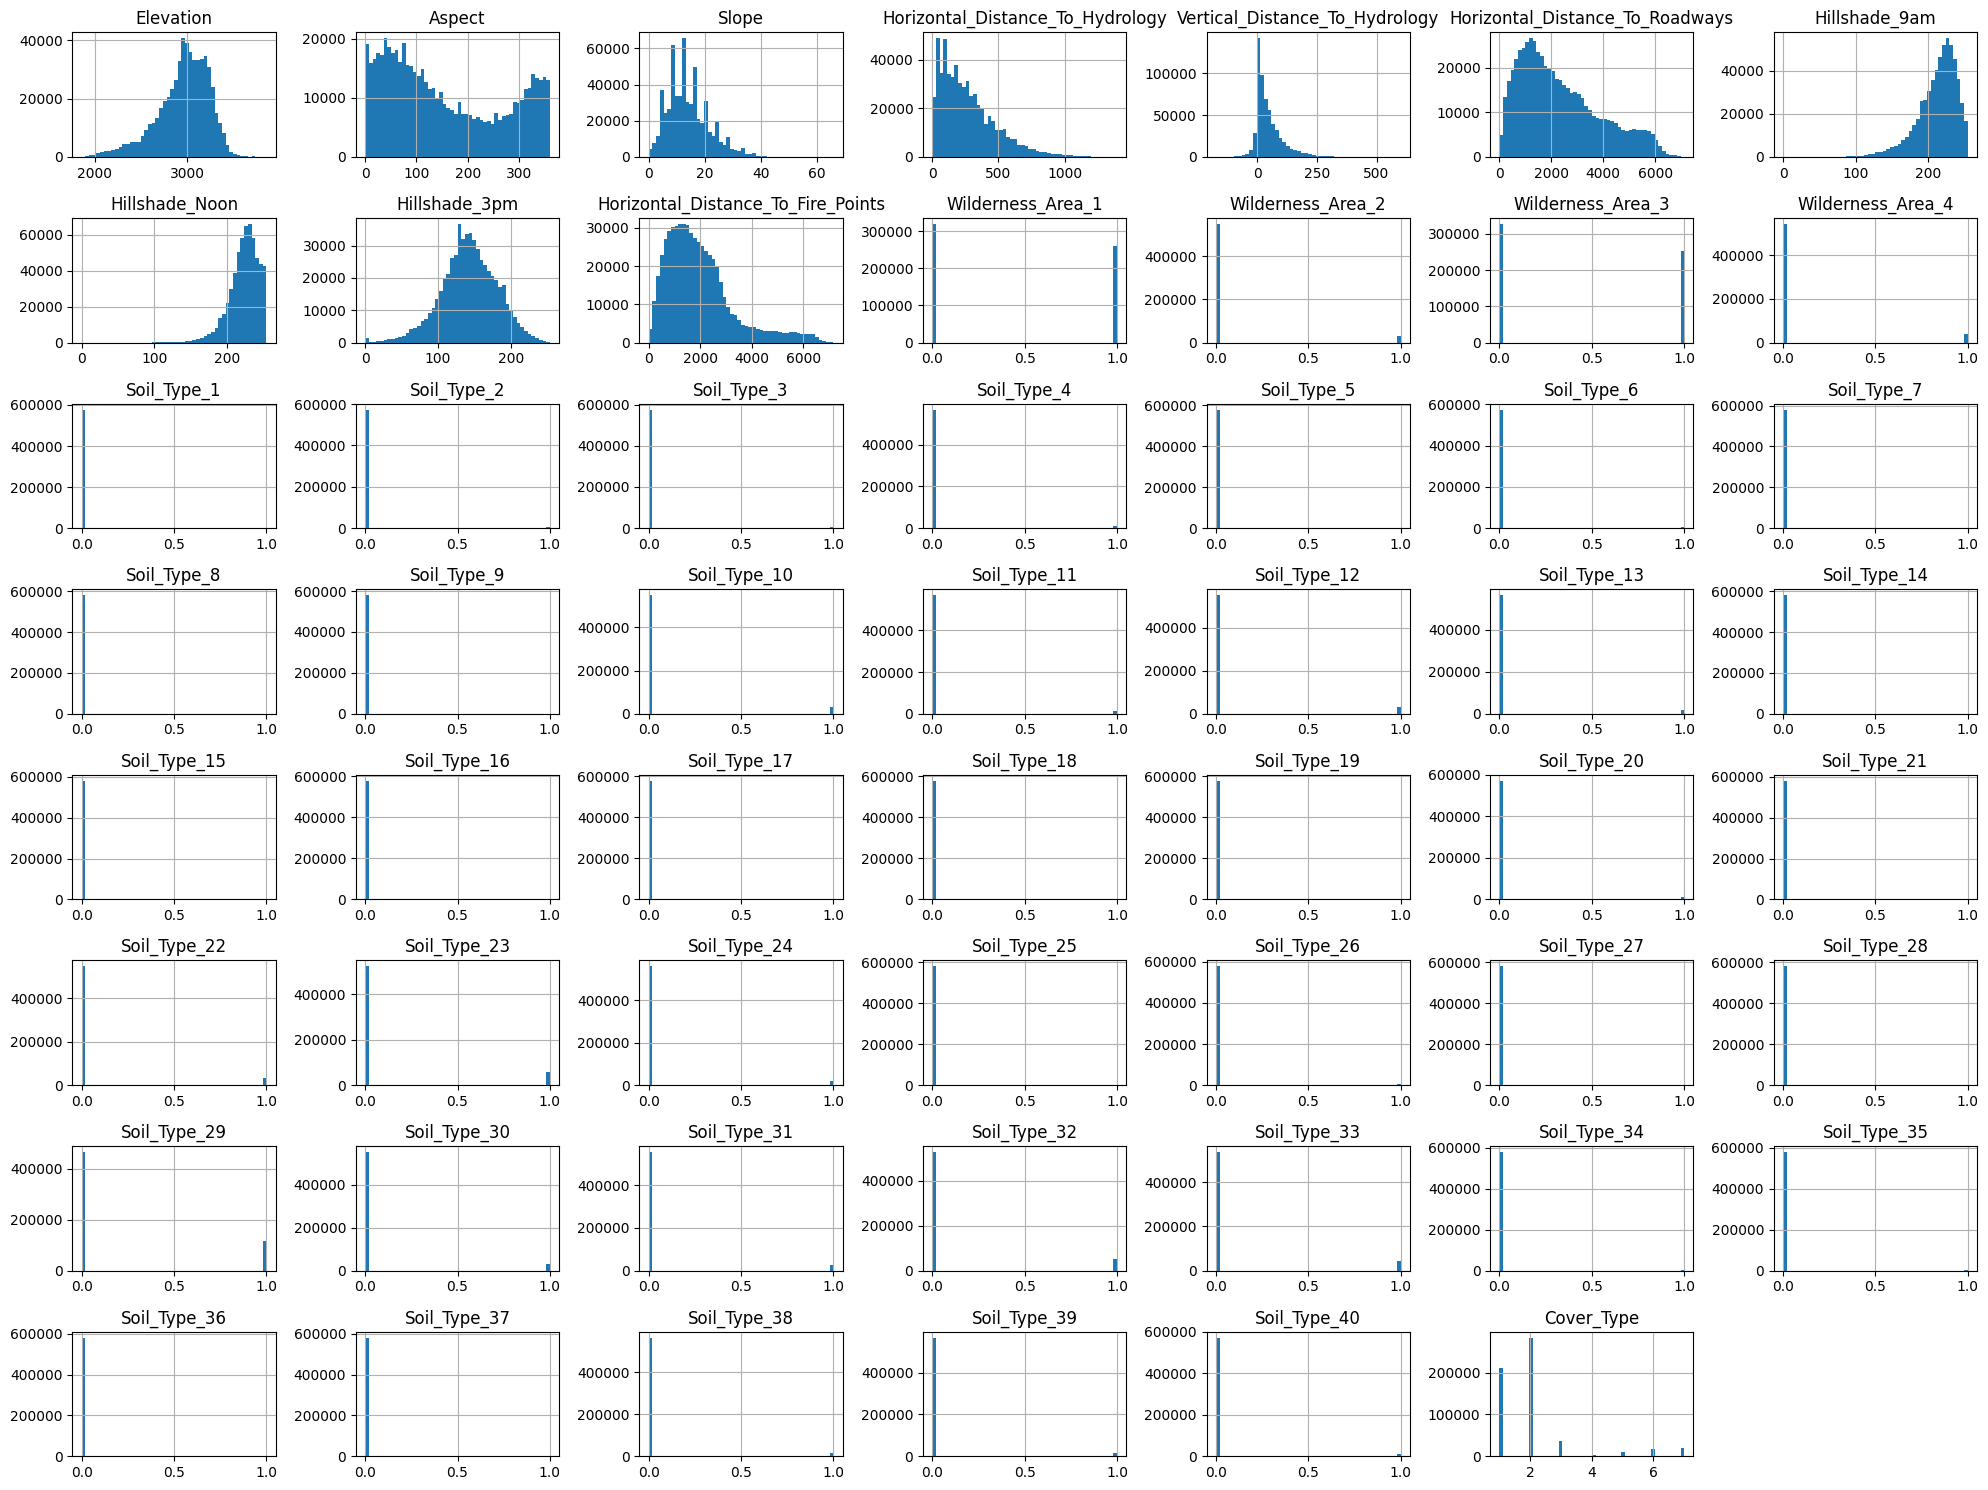

In [11]:
#Histogramas de todas las variables
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

_PON AQUÍ TU RESPUESTA_

Cuando observamos la distribuión por cada variable se ve que no presentan una distribución normal, excepto por al variable (Hillshade_3pm).

E las clases binarias, se ve que hay más del tipo 0 que del 1.

Al ver la distribución de los tipos de covertura vegetal en la variable (cover_type) se observa que 'Lodgepole Pine' tiene mayor cantidad de observaciones y 'Cottonwood/Willow' es la que menos tiene.

¿Existen valores nulos o perdidos en el dataset?

In [12]:
## PON AQUÍ TU CÓDIGO
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [13]:
print("Agrupadas por filas y columnas \n", df.isna())

Agrupadas por filas y columnas 
         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           False   False  False                             False   
1           False   False  False                             False   
2           False   False  False                             False   
3           False   False  False                             False   
4           False   False  False                             False   
...           ...     ...    ...                               ...   
581007      False   False  False                             False   
581008      False   False  False                             False   
581009      False   False  False                             False   
581010      False   False  False                             False   
581011      False   False  False                             False   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                False             

_PON AQUÍ TU RESPUESTA_

No hay datos nulos en el datset

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamos filtar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [14]:
## PON AQUÍ TU CÓDIGO
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Filtra las correlaciones mayores a 0.80 en valor absoluto con respecto a 'Cover_Type'
high_correlations = correlation_matrix['Cover_Type'][abs(correlation_matrix['Cover_Type']) > 0.80]

Markdown(f"""
### Varaibles altamente correlacionadas con la variable objetivo >80%
- **Las variables altamente corrrelacionadas son:** {(high_correlations)}
- No hay variables altamente corrrelacionadas
""")


### Varaibles altamente correlacionadas con la variable objetivo >80%
- **Las variables altamente corrrelacionadas son:** Cover_Type    1.0
Name: Cover_Type, dtype: float64
- No hay variables altamente corrrelacionadas


In [15]:
#se imprimen las 10 variables más correlacionas
print(correlation_matrix.nlargest(10, 'Cover_Type')['Cover_Type'].sort_values(ascending=False))

Cover_Type           1.000000
Wilderness_Area_4    0.323200
Soil_Type_10         0.243876
Soil_Type_38         0.160170
Soil_Type_39         0.155668
Slope                0.148285
Soil_Type_40         0.128351
Soil_Type_2          0.118135
Soil_Type_6          0.112958
Soil_Type_4          0.099672
Name: Cover_Type, dtype: float64


In [16]:
# columnas especificadas
selected_columns = ['Cover_Type', 'Wilderness_Area_4', 'Soil_Type_10', 'Soil_Type_38', 'Soil_Type_39',
                    'Slope', 'Soil_Type_40', 'Soil_Type_2', 'Soil_Type_6', 'Soil_Type_4']
selected_df = df[selected_columns]

# Calcula la matriz de correlación
correlation_matrix = selected_df.corr()

# Muestra la matriz de correlación
correlation_matrix


,Cover_Type,Wilderness_Area_4,Soil_Type_10,Soil_Type_38,Soil_Type_39,Slope,Soil_Type_40,Soil_Type_2,Soil_Type_6,Soil_Type_4
Cover_Type,1.000000,0.323200,0.243876,0.160170,0.155668,0.148285,0.128351,0.118135,0.112958,0.099672
Wilderness_Area_4,0.323200,1.000000,0.485031,-0.043260,-0.040669,0.255503,-0.032233,0.103850,0.410422,0.021924
Soil_Type_10,0.243876,0.485031,1.000000,-0.040484,-0.038059,0.244037,-0.030165,-0.027944,-0.026099,-0.036019
Soil_Type_38,0.160170,-0.043260,-0.040484,1.000000,-0.025891,-0.072208,-0.020521,-0.019010,-0.017755,-0.024503
Soil_Type_39,0.155668,-0.040669,-0.038059,-0.025891,1.000000,0.093602,-0.019292,-0.017871,-0.016691,-0.023035
Slope,0.148285,0.255503,0.244037,-0.072208,0.093602,1.000000,0.025637,-0.018553,0.003673,0.131847
Soil_Type_40,0.128351,-0.032233,-0.030165,-0.020521,-0.019292,0.025637,1.000000,-0.014164,-0.013229,-0.018257
Soil_Type_2,0.118135,0.103850,-0.027944,-0.019010,-0.017871,-0.018553,-0.014164,1.000000,-0.012255,-0.016913
Soil_Type_6,0.112958,0.410422,-0.026099,-0.017755,-0.016691,0.003673,-0.013229,-0.012255,1.000000,-0.015796
Soil_Type_4,0.099672,0.021924,-0.036019,-0.024503,-0.023035,0.131847,-0.018257,-0.016913,-0.015796,1.000000


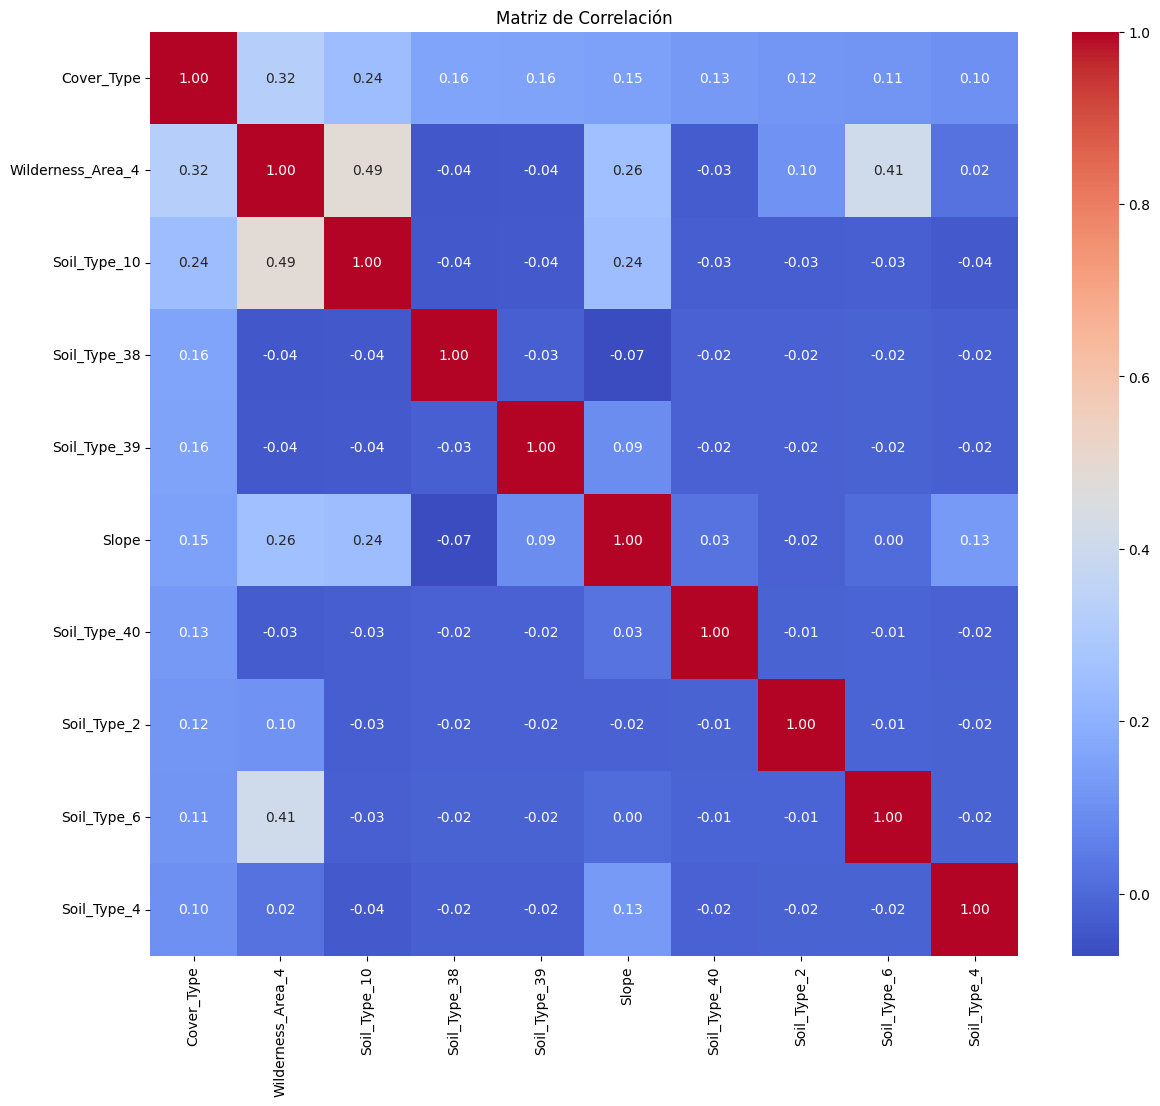

In [17]:
#se muestra la matriz de corelación de manera gráfica

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Generar el heatmap de correlación con Seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.ylim(len(correlation_matrix), 0)
plt.xlim(0, len(correlation_matrix))

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

¿Cuáles son las tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

In [18]:
#aquí se puede ver las variables más correlacionadas con la variable objetivo
top_correlated = correlation_matrix.nlargest(4, 'Cover_Type')['Cover_Type'].iloc[1:] # Excluir 'Cover_Type'
formatted_output = "\n".join([f"- {idx}: {val:.4f}" for idx, val in top_correlated.items()])

Markdown(f"""
### Top 3 más correlacionadas con la variable objetivo
- **Las 3 variables más correlacionadas son:**
{formatted_output}
- **Existen otras correlaciones, como por ejemplo, la varible Wilderness_Area_4 con Soil_Type_10 y Soil_Type_6, aun así son muy débiles proque no superan el 50% entre sí. También, se observa que hay descorrelación entre variables, es decir no hay dependencias significativas.**
""")


### Top 3 más correlacionadas con la variable objetivo
- **Las 3 variables más correlacionadas son:**
- Wilderness_Area_4: 0.3232
- Soil_Type_10: 0.2439
- Soil_Type_38: 0.1602
- **Existen otras correlaciones, como por ejemplo, la varible Wilderness_Area_4 con Soil_Type_10 y Soil_Type_6, aun así son muy débiles proque no superan el 50% entre sí. También, se observa que hay descorrelación entre variables, es decir no hay dependencias significativas.**


In [19]:
#sin embargo a continuación se intentará visualizar la corrrelación entre variables en función de las clases de la variable objetivo

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Definir el umbral de correlación
threshold = 0.5

# Buscar características continuas altamente correlacionadas
corr_list = []
for i in range(0, 10):
    for j in range(i+1, 10):  # para evitar repeticiones
        if (corr_matrix.iloc[i, j] >= threshold and corr_matrix.iloc[i,j] < 1) or (
            corr_matrix.iloc[i,j] < 0 and corr_matrix.iloc[i,j] <= -threshold):
            corr_list.append([corr_matrix.iloc[i, j], i, j])  # Almacenar correlación e índices de columnas

# Mostrar las correlaciones mayores primero
s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

markdown_output_lines = []
for v, i, j in s_corr_list:
    markdown_output_lines.append(f"- {column_names[i]} and {column_names[j]} = {v:.2f}")

markdown_output = "\n".join(markdown_output_lines)

Markdown(f"""
### Correlación entre variables en función de las clases de la variable objetivo
{markdown_output}
""")


### Correlación entre variables en función de las clases de la variable objetivo
- Hillshade_9am and Hillshade_3pm = -0.78
- Aspect and Hillshade_3pm = 0.65
- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
- Hillshade_Noon and Hillshade_3pm = 0.59
- Aspect and Hillshade_9am = -0.58
- Slope and Hillshade_Noon = -0.53


In [20]:
#lista de columnas
columns =("Elevation",
          "Aspect",
          "Slope",
          "Horizontal_Distance_To_Hydrology",
          "Vertical_Distance_To_Hydrology",
          "Horizontal_Distance_To_Roadways",
          "Hillshade_9am",
          "Hillshade_Noon",
          "Hillshade_3pm",
          "Horizontal_Distance_To_Fire_Points",
          "Wilderness_Area_1",
          "Wilderness_Area_2",
          "Wilderness_Area_3",
          "Wilderness_Area_4",
          "Soil_Type_1",
          "Soil_Type_2",
          "Soil_Type_3",
          "Soil_Type_4",
          "Soil_Type_5",
          "Soil_Type_6",
          "Soil_Type_7",
          "Soil_Type_8",
          "Soil_Type_9",
          "Soil_Type_10",
          "Soil_Type_11",
          "Soil_Type_12",
          "Soil_Type_13",
          "Soil_Type_14",
          "Soil_Type_15",
          "Soil_Type_16",
          "Soil_Type_17",
          "Soil_Type_18",
          "Soil_Type_19",
          "Soil_Type_20",
          "Soil_Type_21",
          "Soil_Type_22",
          "Soil_Type_23",
          "Soil_Type_24",
          "Soil_Type_25",
          "Soil_Type_26",
          "Soil_Type_27",
          "Soil_Type_28",
          "Soil_Type_29",
          "Soil_Type_30",
          "Soil_Type_31",
          "Soil_Type_32",
          "Soil_Type_33",
          "Soil_Type_34",
          "Soil_Type_35",
          "Soil_Type_36",
          "Soil_Type_37",
          "Soil_Type_38",
          "Soil_Type_39",
          "Soil_Type_40",
          "Cover_Type")

df.columns= columns

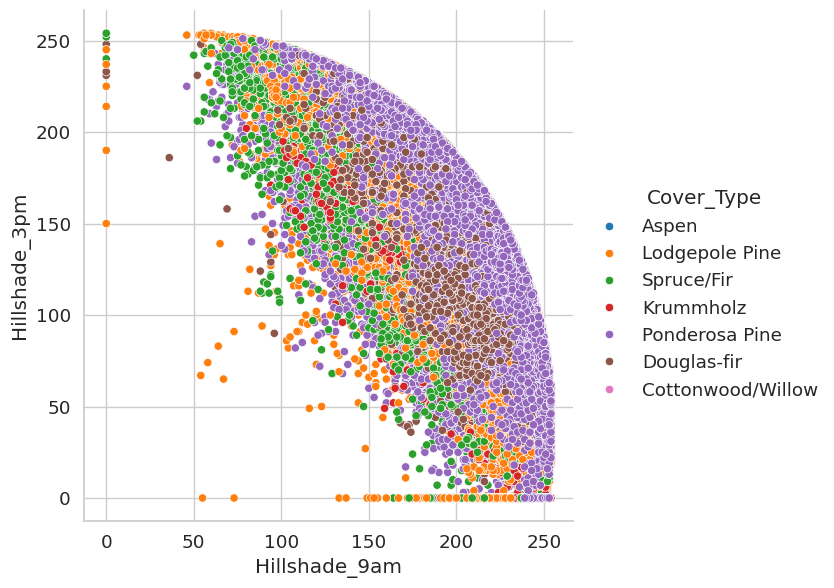

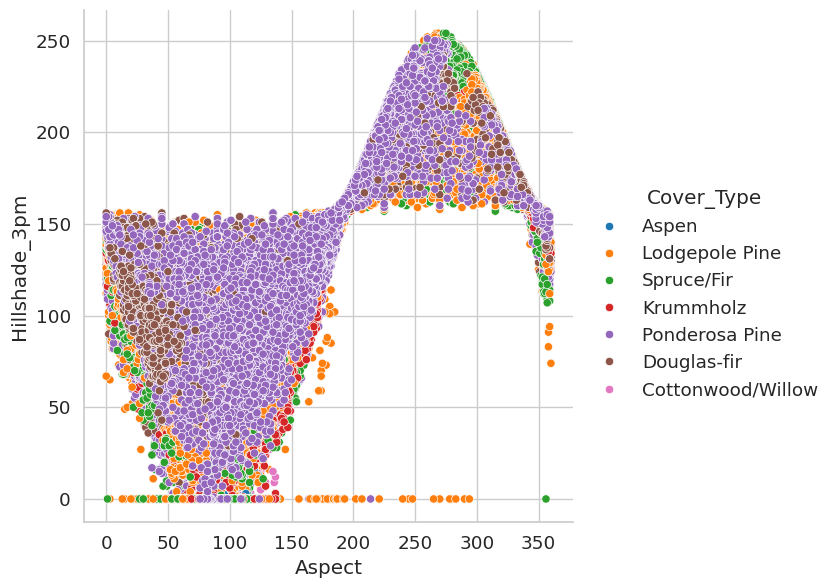

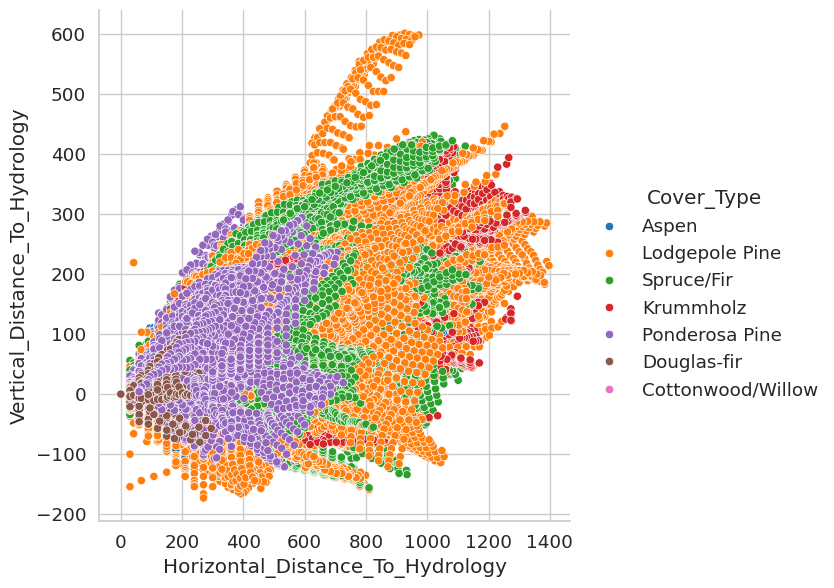

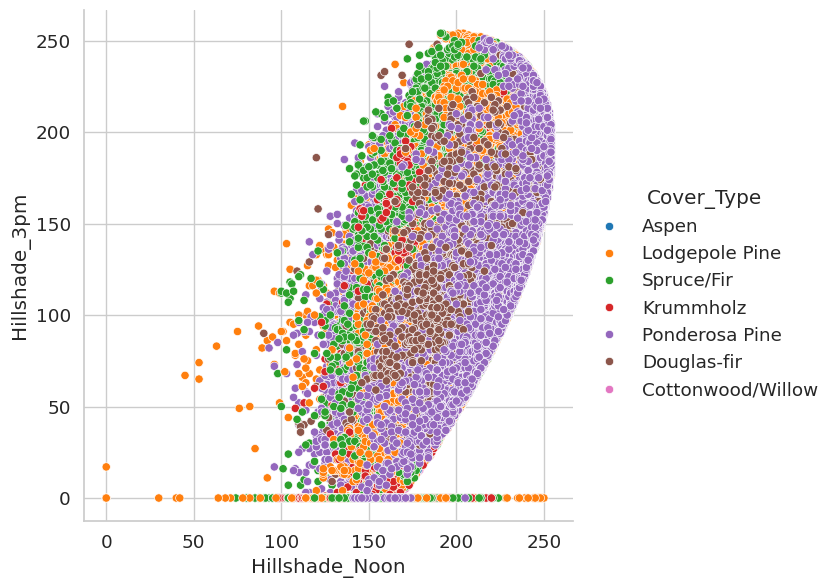

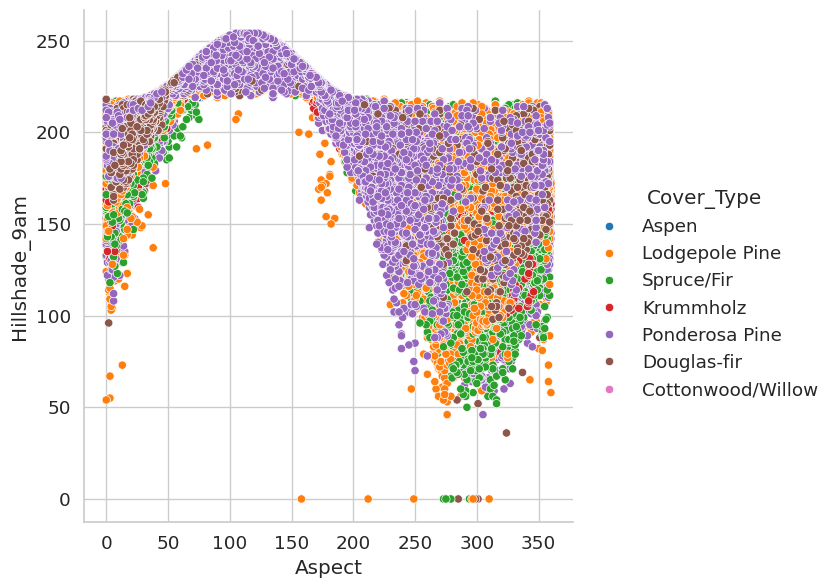

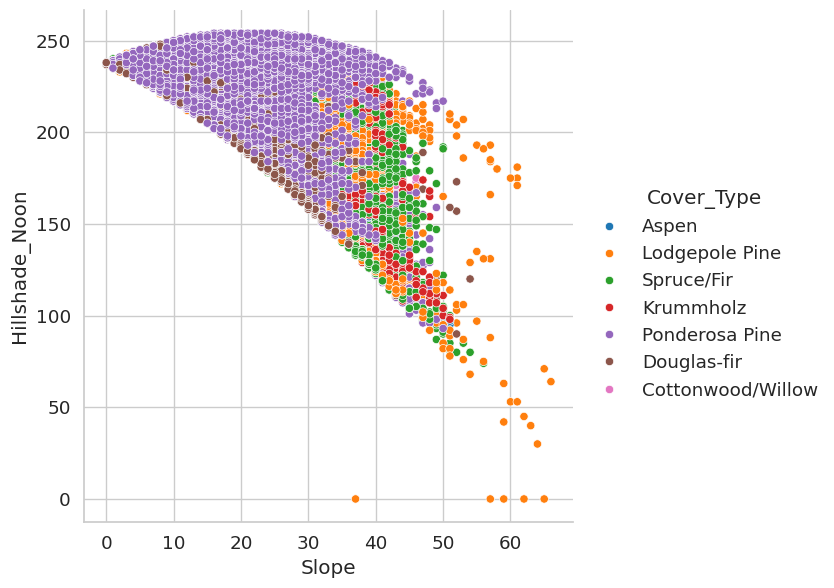

In [21]:
# Para mapear los números de clase a los nombres de clase correspondientes
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
df['Cover_Type'] = df['Cover_Type'].map({i+1: class_name for i, class_name in enumerate(class_names)})

# Ajustar el estilo general
sns.set_style("whitegrid")

# Ajustar el contexto del gráfico
sns.set_context("notebook", font_scale=1.2)

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("viridis")

# Crear el pairplot con los nombres de las clases
for v, i, j in s_corr_list:
    sns.pairplot(df, hue='Cover_Type', palette='tab10', height=6, x_vars=columns[i], y_vars=columns[j])
    plt.show()

In [ ]:
Markdown(f"""
### Análisis de correlación entre variables en función de las clases de la variable objetivo
- **Separabilidad de las Clases :** En general las clases no se ven completamente sepadas, lo cual es retador para el calsificador, solo el Ponderosa Pine tiende a agruparse más que las demas clases frente a las variables.
- **Solapamiento y Distribución :** Como se menciono antes solo el Ponderosa Pine tiende a agruparse más que las demas clases frente a las variables, además se observa que hay valores que comparten el mismo espacio, esto dificulta la tareas para distinguir las clases.
- **Multicolinealidad y Modelos :** Si biene es cierto que las clases tienden a agruparse por regiones, y hay cierta correlación entre varibales como ele caso Hillshade_9am and Hillshade_3pm, no hay multicolinealidad fuerte entre las variables y las clases, de pronto se podría omitir algunas y ver que pasa. Además, para los clasificadores como, por ejemplo, Random Forest y SVM, que no asumen independencia lineal entre las características, esto no representa un problema significativo para el entrenamiento.
""")


### Análisis de correlación entre variables en función de las clases de la variable objetivo
- **Separabilidad de las Clases :** En general las clases no se ven completamente sepadas, lo cual es retador para el calsificador, solo el Ponderosa Pine tiende a agruparse más que las demas clases frente a las variables.
- **Solapamiento y Distribución :** Como se menciono antes solo el Ponderosa Pine tiende a agruparse más que las demas clases frente a las variables, además se observa que hay valores que comparten el mismo espacio, esto dificulta la tareas para distinguir las clases.
- **Multicolinealidad y Modelos :** Si biene es cierto que las clases tienden a agruparse por regiones, y hay cierta correlación entre varibales como ele caso Hillshade_9am and Hillshade_3pm, no hay multicolinealidad fuerte entre las variables y las clases, de pronto se podría omitir algunas y ver que pasa. Además, para los clasificadores como, por ejemplo, Random Forest y SVM, que no asumen independencia lineal entre las características, esto no representa un problema significativo para el entrenamiento.


# **2. Entrenamiento**

## **2.1 Clasificación**

1.   Elemento de la lista
2.   Elemento de la lista



**2.1.1 Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

n_estimators: es un hiperparámetro que sirve para controlar el número de árboles de decisión que se construyen en el proceso de entrenamiento del modelo, o sea en el bosque, es bueno usar técnicas de validación cruzada para encontrar un equilibrio entre el rendimiento del modelo y la eficiencia computacional.

criterion: encargado de medir la uniformidad de los nodos. Sirve para medir las similitudes y las diferencias.

max_depth: es la profundiad del arbol en funcion de cuántos niveles tiene. Sirve para evitar el sobre ajuste.

min_samples_split: número de datos mínimo requerido para que un nodo pueda dividirse. Sirve para reducir el sobre ajuste.

min_samples_leaf: el número minimo que un nodo debe tener para ser considerado como hoja. Sirve para obligar a los nodos para no seguirse dividiendo y convertirse en hoja, ayuda a reducir el sobre ajuste.

max_features: el número maximo de variables a cosiderar en el spliter cuando busca la mejor división.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Este hiperparámetro indica cómo se deben ponderar las clases en un problema de clasificación, es decir, cuando hay desbalance en las observaciones de las clases, esto ayuda para evitar el sesgo hacia las clases mas comunes a al ahora de predecir asignando peso diferente a cada clase. Se pueden encontrar algunos argumentos que soporta como, por ejemplo, (none) que trata a todas las clases por igual sin importar su frecuencia y (balanced) que asigna peso automáticamente y de manera proporcional a la frecuencia de las clases cuando estan desbalanceadas.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO

#no se hará preprocesado o escalado de de datos, random forest es tolerante y no se ven afectados por la escala de las características,
#ya que cada árbol de decisión se construye de forma independiente.


Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [ ]:
#Realizar prueba inicial con el ánimo de conocer el nuemro de arboles óptimo
#importar dependencias

import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too fe

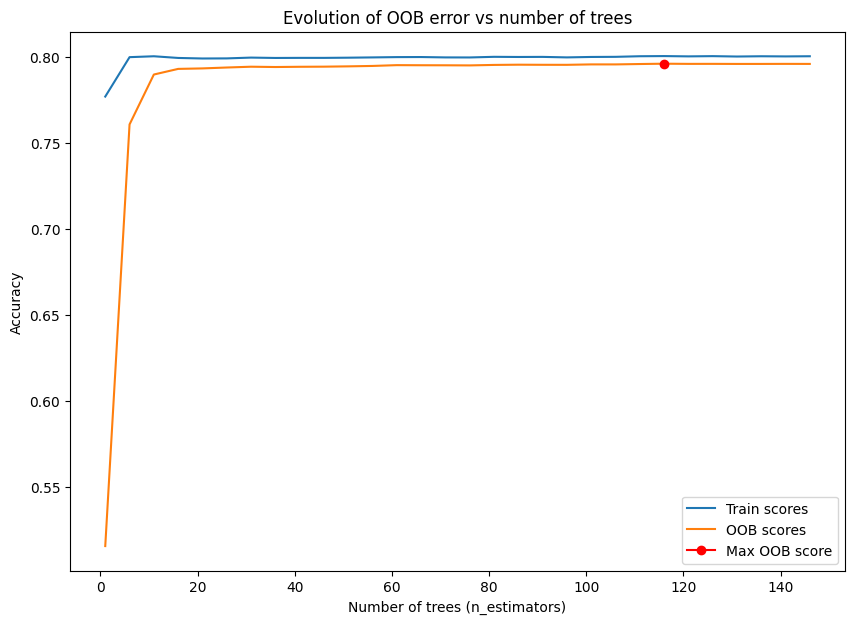

Optimal number of trees: 116
Accuracy with 116 trees: 0.7969
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.78      0.86      0.82      7121
           4       0.84      0.68      0.75       526
           5       0.83      0.25      0.39      1995
           6       0.76      0.37      0.49      3489
           7       0.89      0.73      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.65      0.69    116203
weighted avg       0.80      0.80      0.79    116203



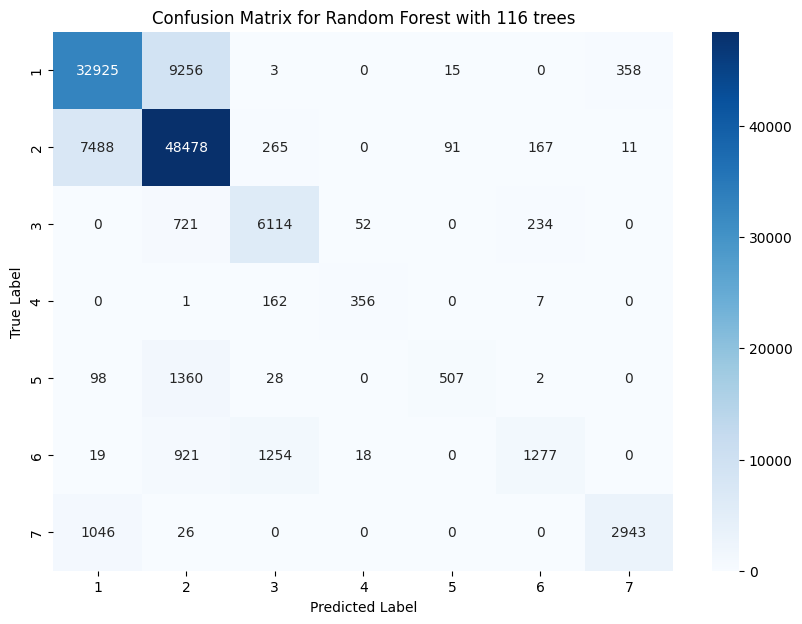

Total correctly classified examples: 92600
Total incorrectly classified examples: 23603


In [ ]:

# remover la variable objetivo del df
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros comunes para todos los modelos
criterion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = None

# Valores evaluados para n_estimators
estimator_range = range(1, 150, 5)

# Almacenar los scores de entrenamiento y OOB
train_scores = []
oob_scores = []

# Iterar sobre los diferentes valores de n_estimators
for n_estimators in estimator_range:
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        oob_score=True,  # Para habilitar el cálculo del OOB score
        random_state=42
    )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Graficar la evolución de los errores
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(estimator_range, train_scores, label="Train scores")
ax.plot(estimator_range, oob_scores, label="OOB scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores), marker='o', color="red", label="Max OOB score")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of trees (n_estimators)")
ax.set_title("Evolution of OOB error vs number of trees")
plt.legend()
plt.show()

# Imprimir el mejor número de estimadores
print(f"Optimal number of trees: {estimator_range[np.argmax(oob_scores)]}")

# Entrenar y evaluar el modelo con el número óptimo de árboles
optimal_n = estimator_range[np.argmax(oob_scores)]
clf_optimal = RandomForestClassifier(
    n_estimators=optimal_n,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    random_state=42
)
clf_optimal.fit(X_train, y_train)
y_pred = clf_optimal.predict(X_test)

# Calcular e imprimir las métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with {optimal_n} trees: {accuracy:.4f}")

class_labels = unique_labels(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Confusion Matrix for Random Forest with {optimal_n} trees')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Para calcular el número total de ejemplos clasificados correctamente e incorrectamente
total_correct = np.trace(cm)
total_incorrect = np.sum(cm) - total_correct
print(f"Total correctly classified examples: {total_correct}")
print(f"Total incorrectly classified examples: {total_incorrect}")

Como se pude observar en el experimento anterior, después de 116 árboles, lo más probable es que no mejore el rendimiento.

Si bien es cierto que 116 puede ser un número óptimo de árboles, la verdad es despues de 10 aprox  no hay una ganancia significativa, esto se ve claramente en la gráfica.

In [ ]:
#Ahora vamos a entrenar los árboles con n_estimators indicados.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Asegúrate de que los datos estén cargados en el DataFrame 'df'
# X: Características, y: Variable objetivo
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros comunes para todos los modelos
criterion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = None


Random Forest con 5 árboles:
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.77      0.87      0.82      7121
           4       0.83      0.66      0.74       526
           5       0.82      0.25      0.38      1995
           6       0.73      0.35      0.48      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203

Matriz de confusión:
[[32873  7307     0     0   112    19  1087]
 [ 9343 48578   637     2  1357   936    56]
 [    3   343  6166   161    26  1282     0]
 [    0     0    51   349     0    19     0]
 [   16    94     0     0   498     0     0]
 [    0   168   267    14     2  1233     0]
 [  322    10     0     0     0     0  2872]]


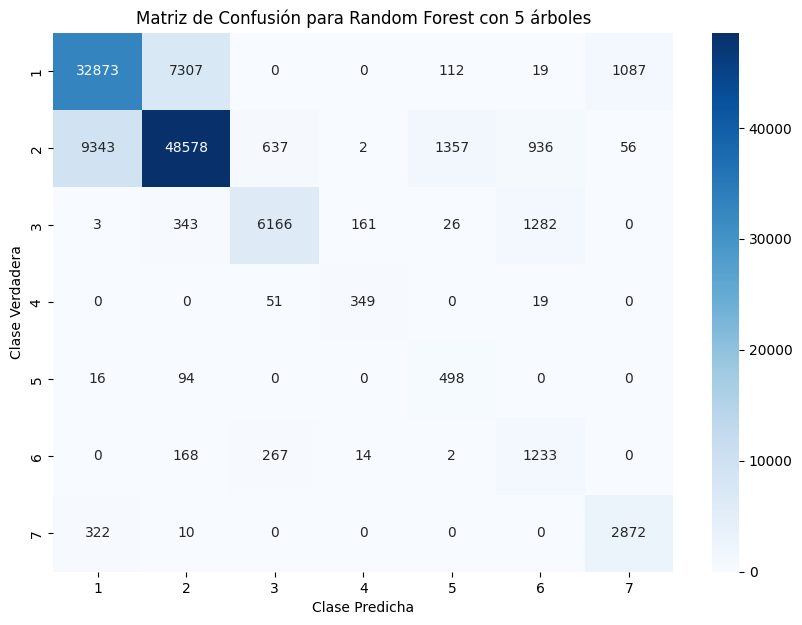

Total de ejemplos clasificados correctamente: 92569 ejemplos
Total de ejemplos clasificados incorrectamente: 23634 ejemplos
Cantidad de ejemplos clasificados correctamente por clase:
Clase 1: 32873 ejemplos
Clase 2: 48578 ejemplos
Clase 3: 6166 ejemplos
Clase 4: 349 ejemplos
Clase 5: 498 ejemplos
Clase 6: 1233 ejemplos
Clase 7: 2872 ejemplos


In [ ]:
# Número de árboles 5
n_trees = 5

# Inicializar y entrenar el modelo de Random Forest
clf_5 = RandomForestClassifier(n_estimators=n_trees, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, random_state=42)
clf_5.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_5 = clf_5.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_5 = accuracy_score(y_test, y_pred_5)

# Calcular la matriz de confusión
cm_5 = confusion_matrix(y_test, y_pred_5)

# Convertir los valores únicos de la variable objetivo en strings
class_labels = [str(label) for label in df['Cover_Type'].unique()]
class_labels.sort()

# Calcular el informe de clasificación
report_5 = classification_report(y_test, y_pred_5, target_names=class_labels)

# Imprimir los resultados
print(f"Random Forest con {n_trees} árboles:")
# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(report_5)
print("Matriz de confusión:")
print(cm_5.T)


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_5.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {n_trees} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la cantidad de ejemplos clasificados correctamente para cada clase
eje_correct_por_clases_5 = {}
for i in range(len(cm_5)):
    eje_correct_por_clases_5[i+1] = cm_5[i, i]

# Calcular el número total de ejemplos clasificados correctamente e incorrectamente
total_correct_5 = np.trace(cm_5)
total_incorrect_5 = np.sum(cm_5) - total_correct_5

# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_5} ejemplos")
print(f"Total de ejemplos clasificados incorrectamente: {total_incorrect_5} ejemplos")

# Imprimir el resultado
print("Cantidad de ejemplos clasificados correctamente por clase:")
for clase, correctos in eje_correct_por_clases_5.items():
    print(f"Clase {clase}: {correctos} ejemplos")



In [ ]:
#para saber cuantas instancias tenia el conjunto de test
X_test.shape

(116203, 54)

In [ ]:
#vemos que el calculo esta correcto
total_correct_5 + total_incorrect_5

np.int64(116203)

Random Forest con 10 árboles:
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.79      0.86      0.82      7121
           4       0.84      0.67      0.75       526
           5       0.82      0.25      0.39      1995
           6       0.75      0.38      0.50      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203

Matriz de confusión:
[[32827  7298     0     0   110    19  1088]
 [ 9398 48646   718     2  1353   927    43]
 [    3   265  6110   163    26  1213     0]
 [    0     0    47   353     0    18     0]
 [   14    95     0     0   504     1     0]
 [    0   186   246     8     2  1311     0]
 [  315    10     0     0     0     0  2884]]


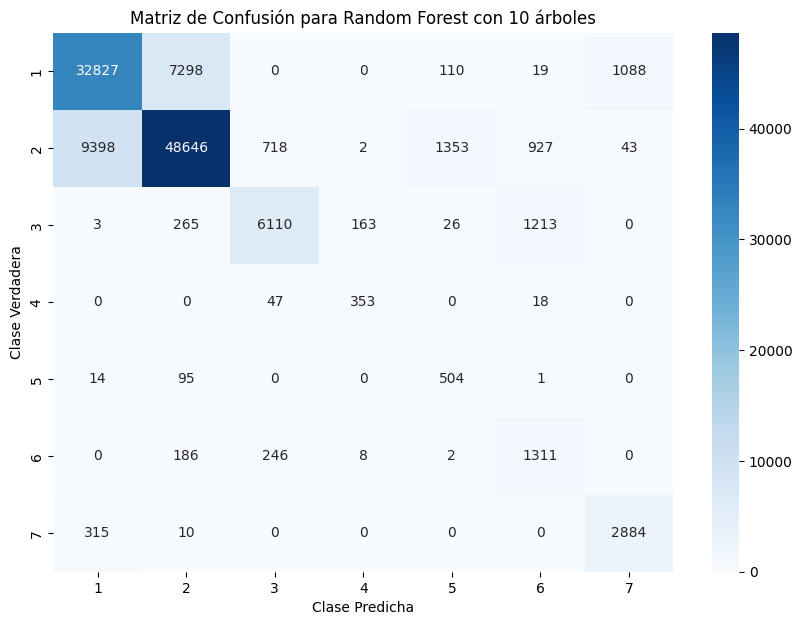

Total de ejemplos clasificados correctamente: 92635 ejemplos
Total de ejemplos clasificados incorrectamente: 23568 ejemplos
Cantidad de ejemplos clasificados correctamente por clase:
Clase 1: 32827 ejemplos
Clase 2: 48646 ejemplos
Clase 3: 6110 ejemplos
Clase 4: 353 ejemplos
Clase 5: 504 ejemplos
Clase 6: 1311 ejemplos
Clase 7: 2884 ejemplos


In [ ]:
# Número de árboles 10
n_trees = 10

# Inicializar y entrenar el modelo de Random Forest
clf_10 = RandomForestClassifier(n_estimators=n_trees, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, random_state=42)
clf_10.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_10 = clf_10.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_10 = accuracy_score(y_test, y_pred_10)

# Calcular la matriz de confusión
cm_10 = confusion_matrix(y_test, y_pred_10)

# Convertir los valores únicos de la variable objetivo en strings
class_labels = [str(label) for label in df['Cover_Type'].unique()]
class_labels.sort()

# Calcular el informe de clasificación
report_10 = classification_report(y_test, y_pred_10, target_names=class_labels)

# Imprimir los resultados
print(f"Random Forest con {n_trees} árboles:")
# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(report_10)
print("Matriz de confusión:")
print(cm_10.T)


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_10.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {n_trees} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la cantidad de ejemplos clasificados correctamente para cada clase
eje_correct_por_clases_10 = {}
for i in range(len(cm_10)):
    eje_correct_por_clases_10[i+1] = cm_10[i, i]

# Calcular el número total de ejemplos clasificados correctamente e incorrectamente
total_correct_10 = np.trace(cm_10)
total_incorrect_10 = np.sum(cm_10) - total_correct_10

# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_10} ejemplos")
print(f"Total de ejemplos clasificados incorrectamente: {total_incorrect_10} ejemplos")

# Imprimir el resultado
print("Cantidad de ejemplos clasificados correctamente por clase:")
for clase, correctos in eje_correct_por_clases_10.items():
    print(f"Clase {clase}: {correctos} ejemplos")



Random Forest con 20 árboles:
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.78      0.86      0.82      7121
           4       0.84      0.67      0.74       526
           5       0.82      0.25      0.39      1995
           6       0.74      0.38      0.50      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203

Matriz de confusión:
[[32872  7477     0     0   100    19  1082]
 [ 9347 48449   719     2  1360   908    34]
 [    3   276  6104   164    26  1235     0]
 [    0     1    48   351     0    17     0]
 [   14    94     0     0   506     0     0]
 [    0   191   250     9     3  1310     0]
 [  321    12     0     0     0     0  2899]]


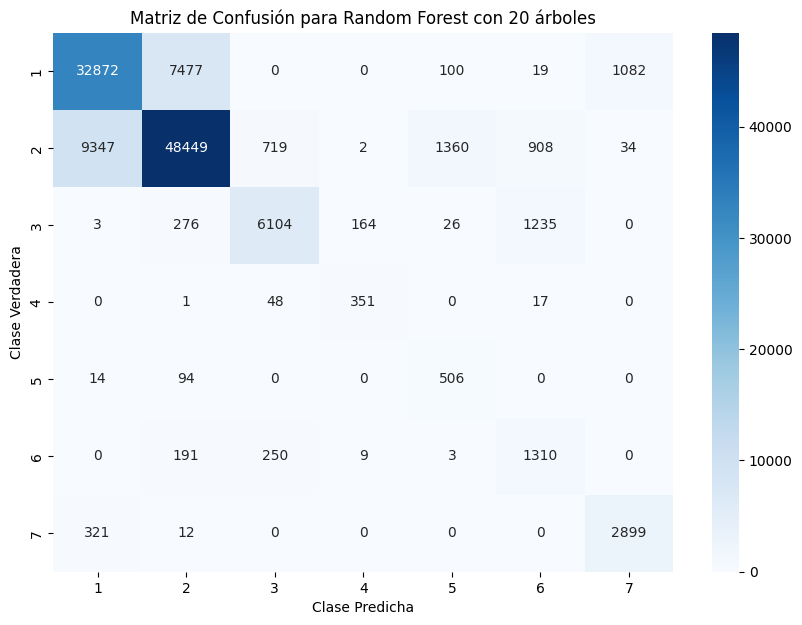

Total de ejemplos clasificados correctamente: 92491 ejemplos
Total de ejemplos clasificados incorrectamente: 23712 ejemplos
Cantidad de ejemplos clasificados correctamente por clase:
Clase 1: 32872 ejemplos
Clase 2: 48449 ejemplos
Clase 3: 6104 ejemplos
Clase 4: 351 ejemplos
Clase 5: 506 ejemplos
Clase 6: 1310 ejemplos
Clase 7: 2899 ejemplos


In [ ]:
# Número de árboles 20
n_trees = 20

# Inicializar y entrenar el modelo de Random Forest
clf_20 = RandomForestClassifier(n_estimators=n_trees, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, random_state=42)
clf_20.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_20 = clf_20.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_20 = accuracy_score(y_test, y_pred_20)

# Calcular la matriz de confusión
cm_20 = confusion_matrix(y_test, y_pred_20)

# Convertir los valores únicos de la variable objetivo en strings
class_labels = [str(label) for label in df['Cover_Type'].unique()]
class_labels.sort()

# Calcular el informe de clasificación
report_20 = classification_report(y_test, y_pred_20, target_names=class_labels)

# Imprimir los resultados
print(f"Random Forest con {n_trees} árboles:")
#print(f"Precisión en prueba = {accuracy:.4f}")
# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(report_20)
print("Matriz de confusión:")
print(cm_20.T)


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_20.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {n_trees} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la cantidad de ejemplos clasificados correctamente para cada clase
eje_correct_por_clases_20 = {}
for i in range(len(cm_20)):
    eje_correct_por_clases_20[i+1] = cm_20[i, i]

# Calcular el número total de ejemplos clasificados correctamente e incorrectamente
total_correct_20 = np.trace(cm_20)
total_incorrect_20 = np.sum(cm_20) - total_correct_20

# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_20} ejemplos")
print(f"Total de ejemplos clasificados incorrectamente: {total_incorrect_20} ejemplos")

# Imprimir el resultado
print("Cantidad de ejemplos clasificados correctamente por clase:")
for clase, correctos in eje_correct_por_clases_20.items():
    print(f"Clase {clase}: {correctos} ejemplos")

Random Forest con 50 árboles:
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.78      0.86      0.82      7121
           4       0.84      0.67      0.75       526
           5       0.83      0.26      0.39      1995
           6       0.75      0.38      0.50      3489
           7       0.89      0.73      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.65      0.70    116203
weighted avg       0.80      0.80      0.79    116203

Matriz de confusión:
[[32823  7494     0     0    97    19  1043]
 [ 9358 48474   720     2  1356   908    27]
 [    3   255  6101   163    26  1227     0]
 [    0     0    51   354     0    18     0]
 [   14    93     0     0   514     0     0]
 [    0   174   249     7     2  1317     0]
 [  359    10     0     0     0     0  2945]]


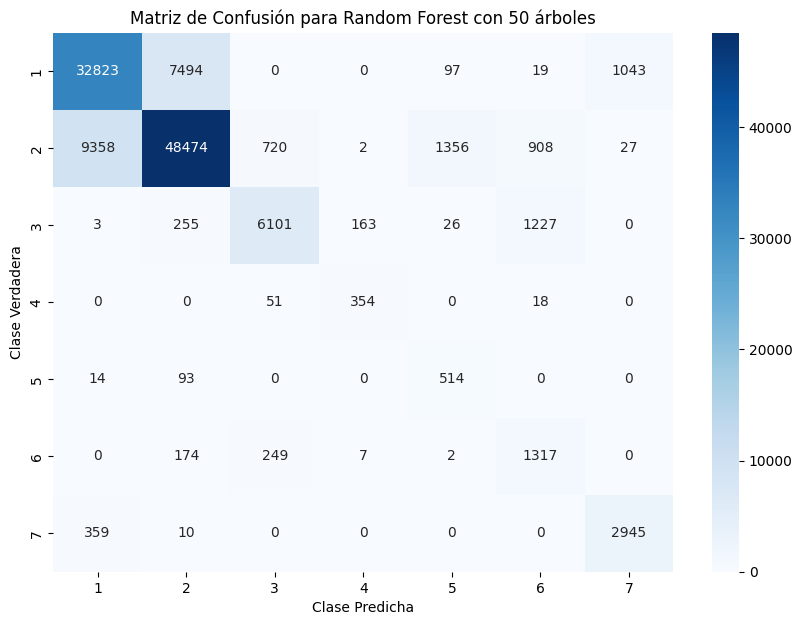

Total de ejemplos clasificados correctamente: 92528 ejemplos
Total de ejemplos clasificados incorrectamente: 23675 ejemplos
Cantidad de ejemplos clasificados correctamente por clase:
Clase 1: 32823 ejemplos
Clase 2: 48474 ejemplos
Clase 3: 6101 ejemplos
Clase 4: 354 ejemplos
Clase 5: 514 ejemplos
Clase 6: 1317 ejemplos
Clase 7: 2945 ejemplos


In [ ]:
# Número de árboles 50
n_trees = 50

# Inicializar y entrenar el modelo de Random Forest
clf_50 = RandomForestClassifier(n_estimators=n_trees, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, random_state=42)
clf_50.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_50 = clf_50.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_50 = accuracy_score(y_test, y_pred_50)

# Calcular la matriz de confusión
cm_50 = confusion_matrix(y_test, y_pred_50)

# Convertir los valores únicos de la variable objetivo en strings
class_labels = [str(label) for label in df['Cover_Type'].unique()]
class_labels.sort()

# Calcular el informe de clasificación
report_50 = classification_report(y_test, y_pred_50, target_names=class_labels)

# Imprimir los resultados
print(f"Random Forest con {n_trees} árboles:")
# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(report_50)
print("Matriz de confusión:")
print(cm_50.T)


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_50.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {n_trees} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la cantidad de ejemplos clasificados correctamente para cada clase
eje_correct_por_clases_50 = {}
for i in range(len(cm_50)):
    eje_correct_por_clases_50[i+1] = cm_50[i, i]

# Calcular el número total de ejemplos clasificados correctamente e incorrectamente
total_correct_50 = np.trace(cm_50)
total_incorrect_50 = np.sum(cm_50) - total_correct_50

# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_50} ejemplos")
print(f"Total de ejemplos clasificados incorrectamente: {total_incorrect_50} ejemplos")

# Imprimir el resultado
print("Cantidad de ejemplos clasificados correctamente por clase:")
for clase, correctos in eje_correct_por_clases_50.items():
    print(f"Clase {clase}: {correctos} ejemplos")

Random Forest con 100 árboles:
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.78      0.86      0.82      7121
           4       0.83      0.68      0.75       526
           5       0.83      0.26      0.39      1995
           6       0.75      0.37      0.50      3489
           7       0.89      0.73      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.65      0.69    116203
weighted avg       0.80      0.80      0.79    116203

Matriz de confusión:
[[32866  7480     0     0    98    19  1044]
 [ 9313 48484   723     1  1358   921    26]
 [    3   258  6108   162    28  1241     0]
 [    0     0    52   356     0    19     0]
 [   15    90     0     0   509     0     0]
 [    0   177   238     7     2  1289     0]
 [  360    11     0     0     0     0  2945]]


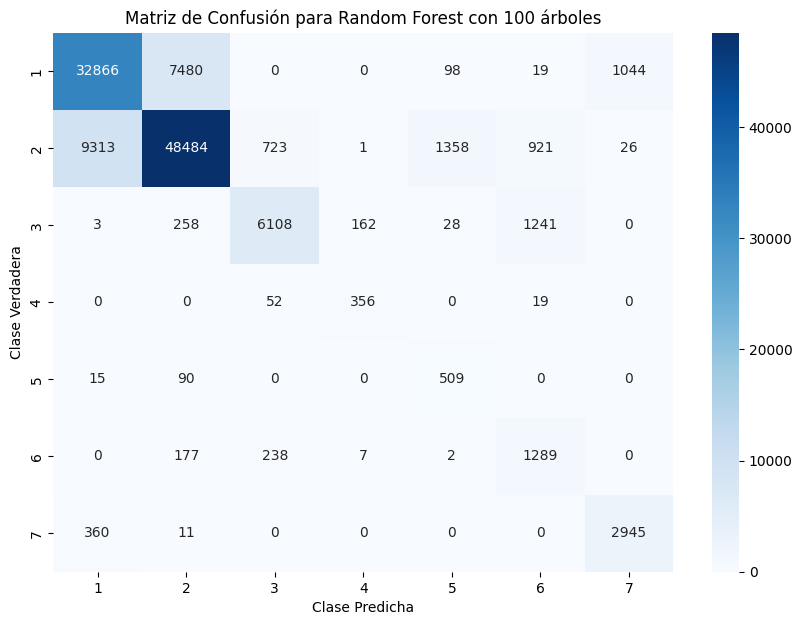

Total de ejemplos clasificados correctamente: 92557 ejemplos
Total de ejemplos clasificados incorrectamente: 23646 ejemplos
Cantidad de ejemplos clasificados correctamente por clase:
Clase 1: 32866 ejemplos
Clase 2: 48484 ejemplos
Clase 3: 6108 ejemplos
Clase 4: 356 ejemplos
Clase 5: 509 ejemplos
Clase 6: 1289 ejemplos
Clase 7: 2945 ejemplos


In [ ]:
# Número de árboles 100
n_trees = 100

# Inicializar y entrenar el modelo de Random Forest
clf_100 = RandomForestClassifier(n_estimators=n_trees, criterion=criterion, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             max_features=max_features, random_state=42)
clf_100.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_100 = clf_100.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_100 = accuracy_score(y_test, y_pred_100)

# Calcular la matriz de confusión
cm_100 = confusion_matrix(y_test, y_pred_100)

# Convertir los valores únicos de la variable objetivo en strings
class_labels = [str(label) for label in df['Cover_Type'].unique()]
class_labels.sort()

# Calcular el informe de clasificación
report_100 = classification_report(y_test, y_pred_100, target_names=class_labels)

# Imprimir los resultados
print(f"Random Forest con {n_trees} árboles:")
# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(report_100)
print("Matriz de confusión:")
print(cm_100.T)


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_100.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {n_trees} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la cantidad de ejemplos clasificados correctamente para cada clase
eje_correct_por_clases_100 = {}
for i in range(len(cm_100)):
    eje_correct_por_clases_100[i+1] = cm_100[i, i]

# Calcular el número total de ejemplos clasificados correctamente e incorrectamente
total_correct_100 = np.trace(cm_100)
total_incorrect_100 = np.sum(cm_100) - total_correct_100

# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_100} ejemplos")
print(f"Total de ejemplos clasificados incorrectamente: {total_incorrect_100} ejemplos")

# Imprimir el resultado
print("Cantidad de ejemplos clasificados correctamente por clase:")
for clase, correctos in eje_correct_por_clases_100.items():
    print(f"Clase {clase}: {correctos} ejemplos")

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

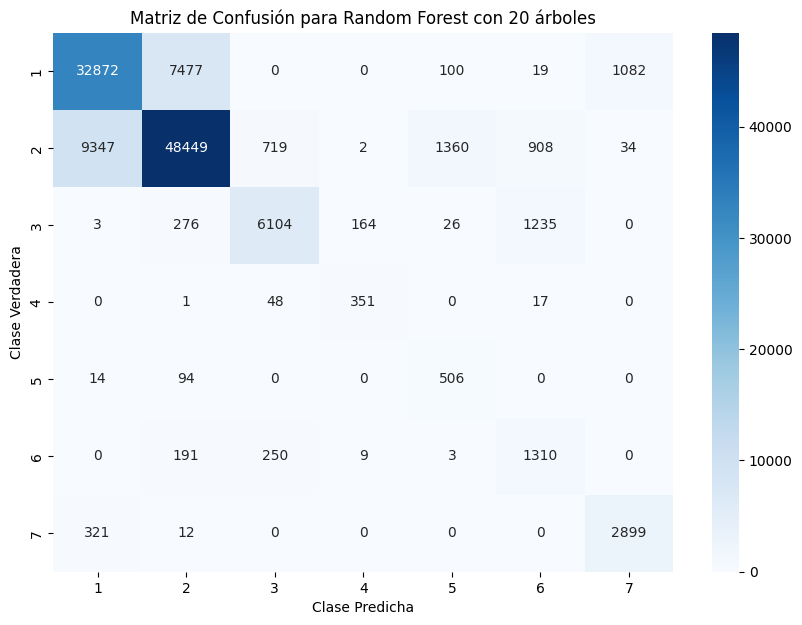

In [ ]:
## PON AQUÍ TU CÓDIGO
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_20.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {20} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

¿Cuántos ejemplos ha clasificado correctamente?

In [ ]:
# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_20} ejemplos")

Total de ejemplos clasificados correctamente: 92491 ejemplos


_PON AQUÍ TU RESPUESTA_

El modelo para 20 árboles ha clasifciado bien 92491 ejemplos

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

In [ ]:
print("Cantidad de ejemplos clasificados correctamente por clase:")
for clase, correctos in eje_correct_por_clases_20.items():
    print(f"Clase {clase}: {correctos} ejemplos")

Cantidad de ejemplos clasificados correctamente por clase:
Clase 1: 32872 ejemplos
Clase 2: 48449 ejemplos
Clase 3: 6104 ejemplos
Clase 4: 351 ejemplos
Clase 5: 506 ejemplos
Clase 6: 1310 ejemplos
Clase 7: 2899 ejemplos


In [ ]:
# Obtener los nombres originales de las clases
original_class_labels = df['Cover_Type'].unique()

# Imprimir los nombres originales de las clases
print(original_class_labels)



[5 2 1 7 3 6 4]


Claramente la clase 1 y 3 (Elevation y Aspect) son la que más ejemplos clasifica bien.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [ ]:
# Calcular el F1-score
f1_5 = f1_score(y_test, y_pred_5, average='weighted')

# Imprimir los resultados
print(f"Random Forest con {5} árboles:")
print(f"Precisión en prueba = {accuracy_5:.4f}")
print(f"F1-score = {f1_5:.4f}")

#########################
# Calcular el F1-score
f1_10 = f1_score(y_test, y_pred_10, average='weighted')

# Imprimir los resultados
print(f"Random Forest con {10} árboles:")
print(f"Precisión en prueba = {accuracy_10:.4f}")
print(f"F1-score = {f1_10:.4f}")

#########################
# Calcular el F1-score
f1_20 = f1_score(y_test, y_pred_20, average='weighted')

# Imprimir los resultados
print(f"Random Forest con {20} árboles:")
print(f"Precisión en prueba = {accuracy_20:.4f}")
print(f"F1-score = {f1_20:.4f}")

#########################
# Calcular el F1-score
f1_50 = f1_score(y_test, y_pred_50, average='weighted')

# Imprimir los resultados
print(f"Random Forest con {50} árboles:")
print(f"Precisión en prueba = {accuracy_50:.4f}")
print(f"F1-score = {f1_50:.4f}")

#########################
# Calcular el F1-score
f1_100 = f1_score(y_test, y_pred_100, average='weighted')

# Imprimir los resultados
print(f"Random Forest con {100} árboles:")
print(f"Precisión en prueba = {accuracy_100:.4f}")
print(f"F1-score = {f1_100:.4f}")

Random Forest con 5 árboles:
Precisión en prueba = 0.7966
F1-score = 0.7909
Random Forest con 10 árboles:
Precisión en prueba = 0.7972
F1-score = 0.7918
Random Forest con 20 árboles:
Precisión en prueba = 0.7959
F1-score = 0.7906
Random Forest con 50 árboles:
Precisión en prueba = 0.7963
F1-score = 0.7910
Random Forest con 100 árboles:
Precisión en prueba = 0.7965
F1-score = 0.7911


El modelo que mejor pesición logró fue el de 10 árboles

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.


In [ ]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA
print("5 árboles \n", report_5)
print("10 árboles \n", report_10)
print("20 árboles \n", report_20)
print("50 árboles \n", report_50)
print("100 árboles \n", report_100)

5 árboles 
               precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.77      0.87      0.82      7121
           4       0.83      0.66      0.74       526
           5       0.82      0.25      0.38      1995
           6       0.73      0.35      0.48      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203

10 árboles 
               precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.79      0.86      0.82      7121
           4       0.84      0.67      0.75       526
           5       0.82      0.25      0.39      1995
           6       0.75      0.38      0.50      3489

In [ ]:
# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_5} ejemplos")
print(f"Total de ejemplos clasificados correctamente: {total_correct_10} ejemplos")
print(f"Total de ejemplos clasificados correctamente: {total_correct_20} ejemplos")
print(f"Total de ejemplos clasificados correctamente: {total_correct_50} ejemplos")
print(f"Total de ejemplos clasificados correctamente: {total_correct_100} ejemplos")

Total de ejemplos clasificados correctamente: 92569 ejemplos
Total de ejemplos clasificados incorrectamente: 92635 ejemplos
Total de ejemplos clasificados correctamente: 92491 ejemplos
Total de ejemplos clasificados incorrectamente: 92528 ejemplos
Total de ejemplos clasificados incorrectamente: 92557 ejemplos



El mejor modelo para test fue el de 10 árboles, su f1 (con "weighted" dado el desbalance de clases) fue de 0.7911, en realidad no hay mucha diferencia con relación a los demas modelos.

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

Matriz de confusión:
[[32827  7298     0     0   110    19  1088]
 [ 9398 48646   718     2  1353   927    43]
 [    3   265  6110   163    26  1213     0]
 [    0     0    47   353     0    18     0]
 [   14    95     0     0   504     1     0]
 [    0   186   246     8     2  1311     0]
 [  315    10     0     0     0     0  2884]]


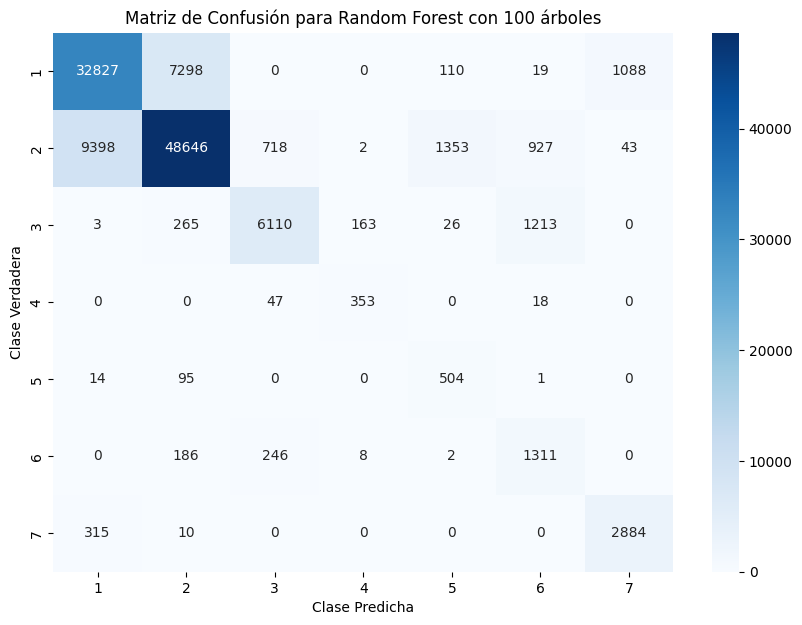

In [ ]:
# matriz de confusión para 10 árboles
print("Matriz de confusión:")
print(cm_10.T)


# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_10.T, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Matriz de Confusión para Random Forest con {n_trees} árboles')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

In [ ]:
# Imprimir los resultados
print(f"Total de ejemplos clasificados correctamente: {total_correct_10} ejemplos")
print(f"Total de ejemplos clasificados incorrectamente: {total_incorrect_10} ejemplos")

Total de ejemplos clasificados correctamente: 92635 ejemplos
Total de ejemplos clasificados incorrectamente: 23568 ejemplos


El modelo para 10 árboles clasificó:

Correctamente: 92635 ejemplos

Incorrectamente: 23568 ejemplos


Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
print("Informe de Clasificación:")
print(report_10)


Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.79      0.86      0.82      7121
           4       0.84      0.67      0.75       526
           5       0.82      0.25      0.39      1995
           6       0.75      0.38      0.50      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203



Se observa que clasifica mejor las clases 2, 3 y 7, en el caso de la 2 es la que más ejemplos tiene, parece sesgado el resultado en función de la cantidad de datos.

En comparación con el primer ejercicio usando OOB con 76 árboles, donde el accuuracy fue 0.75, la diferencia es es de 0.4, siendo mejor este caso de 10 árboles.

**2.1.2 Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

El parámetro C controla la fuerza de la regularización, es decir, un valor en C pequeño permite un margen amplio y permite más errores de clasifciación, o si el valor en C en grade produce el efecto contrario pero puede sobre ajustar.

El Kernel define la función de tranformación para aumentar la dimesión en los datos para que sean lianealmente separables.

Por ejemlo, linear:
Utiliza un hiperplano lineal.
poly: Un polinomio de grado degree.
rbf: Función de base radial (gaussiana).
sigmoid: Función sigmoide.


El degree define el grado del polinomio solo si el kernel es poly.

El gamma define como se comportal el kernel para los puntos, un gamma bajo significa una influencia grande para puntos de soporte lejanos, lo que puede producir un modelo más suave.

Por el contrario un gamma alto, se enfoca en los puntos más cercanos, por lo tanto, puede causar sobre ajuste.


Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

 El hiperparámetro (decision_function_shape) define la forma de la función de decisión para clasificación multiclase. Especalmente, este hiperparámetro es relevante cuando se utiliza el método de clasificación "one-vs-one" o "one-vs-rest".

 Por ejmeplo:
 ovo (one-vs-one): En este enfoque, se entrenan C(C - 1)/2 clasificadores, donde C es el número de clases. Cada clasificador se entrena en un par de clases distintas. Durante la predicción, se utilizan todos estos clasificadores y la clase que recibe más "votos" es la clase predicha.

 ovo puede ser más preciso donde las clases están balanceadas pero consume muchos recursos de cómputo.

 ovr (one-vs-rest): En este enfoque, se entrena un clasificador por cada clase, cada clasificador distingue entre una clase y todas las demás. Durante la predicción, el clasificador que da la mayor puntuación para su clase correspondiente determina la clase predicha.

 ovr puede ser más rápido y funciona bien para problmeas con muchas clases, pero puede ser menos preciso si hay alguna clase sesgada que predomina.


Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [ ]:
df2 = df.head(100000)

In [ ]:
df2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100,52,16,376,50,3816,227,203,105,4295,...,0,0,0,0,0,0,0,0,0,1
99996,3090,50,16,361,40,3840,225,202,106,4268,...,0,0,0,0,0,0,0,0,0,1
99997,3083,45,18,335,33,3864,222,198,104,4241,...,0,0,0,0,0,0,0,0,0,1
99998,3077,41,15,309,43,3889,221,205,116,4214,...,0,0,0,0,0,0,0,0,0,1


Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

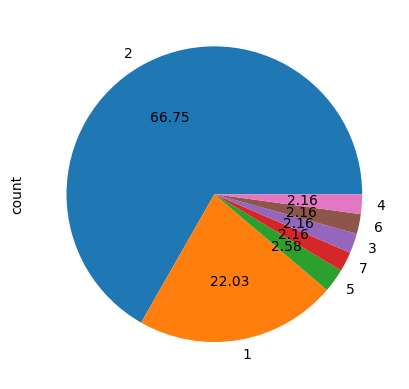

In [ ]:
df2['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [ ]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

X, y = df2.drop('Cover_Type',axis=1),df2['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train.shape

(80000, 54)

In [ ]:
X_test.shape

(20000, 54)

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS
escaler = StandardScaler()

X_train = escaler.fit_transform(X_train)
X_test = escaler.transform(X_test)

## COMPLETAR

In [ ]:
X_train

array([[ 0.26646873,  1.12579961, -0.43060763, ..., -0.09099727,
        -0.09442615, -0.08448723],
       [ 0.21015775, -0.43554655, -1.04609937, ..., -0.09099727,
        -0.09442615, -0.08448723],
       [-1.30157531, -0.55120182,  0.80037583, ..., -0.09099727,
        -0.09442615, -0.08448723],
       ...,
       [-2.83496644,  1.72335184,  3.26234277, ..., -0.09099727,
        -0.09442615, -0.08448723],
       [-1.24526434, -0.05002898,  0.95424877, ..., -0.09099727,
        -0.09442615, -0.08448723],
       [-0.84242429, -1.27404726,  1.5697405 , ..., -0.09099727,
        -0.09442615, -0.08448723]])

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

SVM con C=0.1:
Tiempo de entrenamiento: 421.0046 segundos
Precisión en prueba: 0.8223
Ejemplos clasificados correctamente: 16445
Ejemplos clasificados incorrectamente: 3555
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.82      0.52      0.63      4473
           2       0.84      0.96      0.90     13294
           3       0.62      0.50      0.55       445
           4       0.77      0.82      0.80       433
           5       0.60      0.33      0.42       494
           6       0.54      0.62      0.58       450
           7       0.93      0.75      0.83       411

    accuracy                           0.82     20000
   macro avg       0.73      0.64      0.67     20000
weighted avg       0.82      0.82      0.81     20000

Matriz de Confusión:
[[ 2312  2128     2     0     8     5    18]
 [  414 12805     4     1    45    21     4]
 [    0     0   222    69    24   130     0]
 [    0     0    10   357     0    66     0]
 [ 

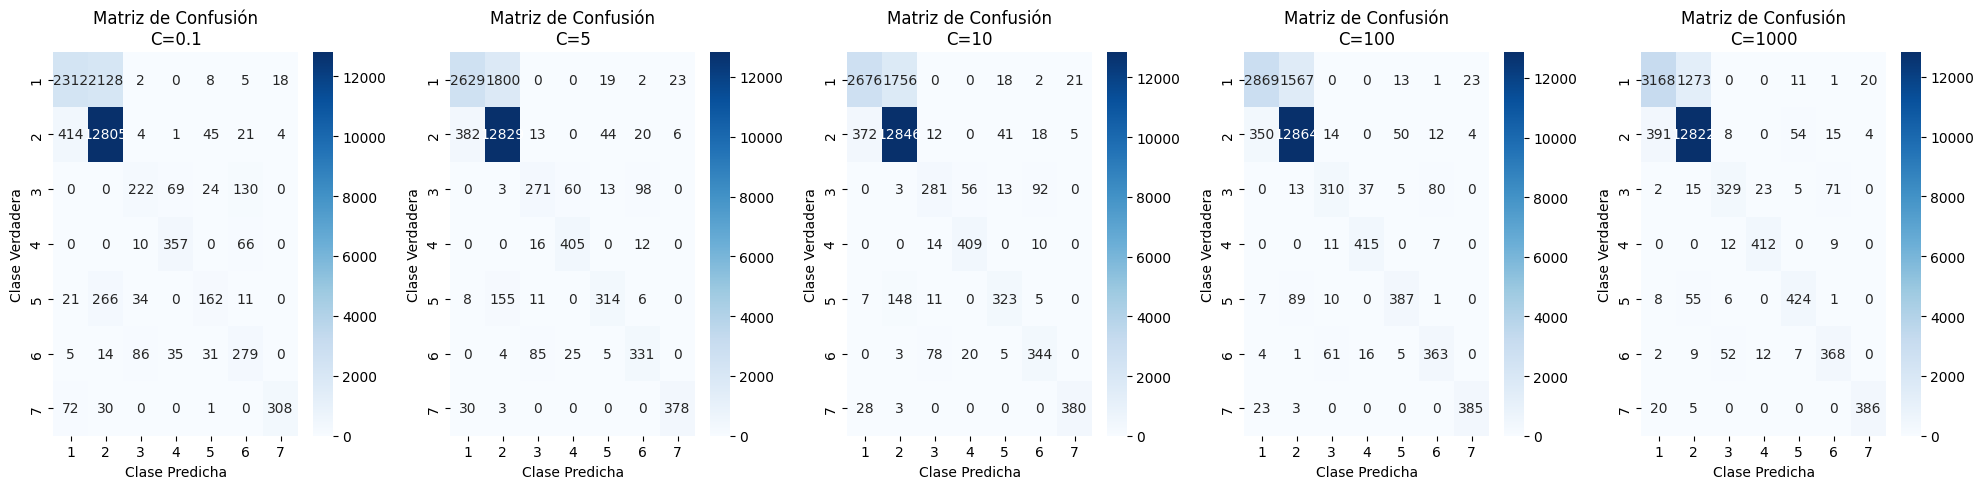

El valor óptimo de C es: 1000


In [ ]:
### PON AQUÍ TU CÓDIGO
# Definir los valores de C a probar
C_values = [0.1, 5, 10, 100, 1000]

# Inicializar listas para guardar resultados
accuracies = []
reports = []
confusion_matrices = []
correct_counts = []
incorrect_counts = []
train_times = []

# Entrenar y evaluar un modelo SVM para cada valor de C
for C in C_values:
    clf = SVC(C=C, kernel='rbf', gamma='scale')

    # Medir el tiempo de entrenamiento
    start_time = time()
    clf.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time
    train_times.append(training_time)

    # Realizar predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión y almacenar el informe de clasificación y la matriz de confusión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    reports.append(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Calcular y almacenar la cantidad de ejemplos clasificados correctamente e incorrectamente
    correct_count = np.trace(cm)
    incorrect_count = np.sum(cm) - correct_count
    correct_counts.append(correct_count)
    incorrect_counts.append(incorrect_count)

    # Imprimir los resultados
    print(f"SVM con C={C}:")
    print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")
    print(f"Precisión en prueba: {accuracy:.4f}")
    print(f"Ejemplos clasificados correctamente: {correct_count}")
    print(f"Ejemplos clasificados incorrectamente: {incorrect_count}")
    print("Informe de Clasificación:")
    print(reports[-1])
    print("Matriz de Confusión:")
    print(cm)
    print("\n")

# Graficar las matrices de confusión para cada valor de C
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))
class_labels = np.unique(y)

for idx, cm in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=class_labels, yticklabels=class_labels)
    axes[idx].set_title(f'Matriz de Confusión\nC={C_values[idx]}')
    axes[idx].set_xlabel('Clase Predicha')
    axes[idx].set_ylabel('Clase Verdadera')

plt.tight_layout()
plt.show()

# Imprimir el valor óptimo de C basado en la precisión
best_C = C_values[np.argmax(accuracies)]
print(f"El valor óptimo de C es: {best_C}")


Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.


Las matrices se pueden observar en el apartado aterior.

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

_indica aquí tu respuesta_

SVM con C=0.1:
Ejemplos clasificados correctamente: 16445

SVM con C=5:
Ejemplos clasificados correctamente: 17157

SVM con C=10:
Ejemplos clasificados correctamente: 17259

SVM con C=100:
Ejemplos clasificados correctamente: 17593

SVM con C=1000:
Ejemplos clasificados correctamente: 17909

Como se puede observar entre los modelos el rendimiento es proporcional al parámetro C.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO
# Ver códido anterior

_indica aquí tu respuesta_

Como se puede ver, sin dusa el mejor modelo que tiene un rendimineto optimo para todas las calses es el del parametreo C=1000, con un F1 mínimo de 0.79 y un máximo de 0.94, para las clases respectivamente y 0.90 general.

No parece verse afectado por el número de observaciones como, por ejemplo, el caso de la clase 4 y 7, deonde apenas 443 y 411 observaciones respectivamente el rendimiento es de los mejores. Por el contrario, la clase 2 con 13294 no fue mejor que los anteriores.


Informe de Clasificación para C = 1000:


              precision    recall  f1-score   support

           1       0.88      0.71      0.79      4473
           2       0.90      0.96      0.93     13294
           3       0.81      0.74      0.77       445
           4       0.92      0.95      0.94       433
           5       0.85      0.86      0.85       494
           6       0.79      0.82      0.80       450
           7       0.94      0.94      0.94       411

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO
print(f"SVM con C={C}:")
print(f"Precisión en prueba: {accuracy:.4f}")


SVM con C=1000:
Precisión en prueba: 0.8954


Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
print("Matriz de Confusión:")
print(cm)

print("Informe de Clasificación:")
print(reports[-1])

print(f"Ejemplos clasificados correctamente: {correct_count}")
print(f"Ejemplos clasificados incorrectamente: {incorrect_count}")

Matriz de Confusión:
[[ 3168  1273     0     0    11     1    20]
 [  391 12822     8     0    54    15     4]
 [    2    15   329    23     5    71     0]
 [    0     0    12   412     0     9     0]
 [    8    55     6     0   424     1     0]
 [    2     9    52    12     7   368     0]
 [   20     5     0     0     0     0   386]]
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.88      0.71      0.79      4473
           2       0.90      0.96      0.93     13294
           3       0.81      0.74      0.77       445
           4       0.92      0.95      0.94       433
           5       0.85      0.86      0.85       494
           6       0.79      0.82      0.80       450
           7       0.94      0.94      0.94       411

    accuracy                           0.90     20000
   macro avg       0.87      0.85      0.86     20000
weighted avg       0.89      0.90      0.89     20000

Ejemplos clasificados correctamente: 179

Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
print("Informe de Clasificación:")
print(reports[-1])

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.88      0.71      0.79      4473
           2       0.90      0.96      0.93     13294
           3       0.81      0.74      0.77       445
           4       0.92      0.95      0.94       433
           5       0.85      0.86      0.85       494
           6       0.79      0.82      0.80       450
           7       0.94      0.94      0.94       411

    accuracy                           0.90     20000
   macro avg       0.87      0.85      0.86     20000
weighted avg       0.89      0.90      0.89     20000



Como se mencionó anteriormente la clase 4 y 7 son la que mejor clasifica el modelo c=10000, en general con esta configuración la gran mayoria clasifica bien.

**2.1.3 Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

El modelo que mejor clasifica es el de la configuración con c=10000, pero también es que mayor tiempo toma, al rededor de 40 minutos.

## 3 **Investigación**

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.

### Artículo 1

Titulo:
Interpretación de Gases Disueltos en Aceite Dieléctrico Mediante Bosques Aleatorios Para la Detección de Anomalías en Transformadores de Potencia


Autores:
A.S. Freire1 J.C. Astudillo1 C.I. Quinatoa1 F.R. Arias1


Revista:
Revista Técnica energía


Freire, A. S., Astudillo, J. C., Quinatoa, C. I., & Arias, F. R. (2023). Interpretación de Gases Disueltos en Aceite Dieléctrico Mediante Bosques Aleatorios Para la Detección de Anomalías en Transformadores de Potencia. Revista Técnica energía, 19(2), 90-98.

http://scielo.senescyt.gob.ec/scielo.php?pid=S2602-84922023000100090&script=sci_arttext

Año de publicación:
2023

Objetivo:
Determinar las fallas internas en transformadores de potencia mediante el uso de bosques aleatorios.


Técnicas o adaptaciones:
Realizaron validación cruzada porque tenían muy pocos datos (128 observaciones).


Principales resultados:
Evaluaron 4 categorías y obtuvieron un 100% para el diagnóstico de descarga de alta energía, 77% para descarga de baja energía, 60% para estado normal y un 97% para el estado de sobrecalentamiento. Obteniendo 78 resultados acertados y 8 datos incorrectos en su validación.



### Artículo 2


Titulo:
Máquinas de soporte vectorial para clasificación supervisada de imágenes en bases de datos espaciales


Autores:
Raúl Alejandro Murillo Castañeda1, Álvaro Enrique Ortiz Davila2


Revista:
Revista Ibérica de Sistemas e Tecnologias de Informação


Castañeda, R. A. M., & Davila, Á. E. O. (2019). Máquinas de soporte vectorial para clasificación supervisada de imágenes en bases de datos espaciales. Revista Ibérica de Sistemas e Tecnologías de Informação, (E17), 538-551.

https://www.proquest.com/openview/e99b828581608485997b06945f5cbfa3/1?pq-origsite=gscholar&cbl=1006393

Año de publicación:
2018

Objetivo:
Clasificar imágenes provenientes de sensores remotos mediante Máquinas de Soporte Vectorial dentro del mismo motor de bases de datos para comparar la eficiencia del algoritmo frente a soluciones de software que realizan clasificación supervisada de imágenes por el método MSV.

Técnicas o adaptaciones:
No realizaron adaptaciones.

Principales resultados:
En general lograron una buena clasificación usando MSV, según el índice de Kappa (0.81%) frente al software Monteverdi (open source ORFEO ToolBox) y ENVI un software comercial, pero no clasifico bien las características de "cuerpos de agua y casco urbano".

## **4 Infomre del entorno**

In [ ]:
# ==============================
# INFORME DEL ENTORNO COLAB
# ==============================

import sys
import platform
import os
from IPython.display import Markdown, display

# --- 1️ Detectar si estás en Colab
in_colab = 'google.colab' in sys.modules

# --- 2️ Información base del sistema
python_version = sys.version.split()[0]
os_info = os.popen('cat /etc/issue').read().strip()

# --- 3️ Librerías principales
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn

# --- 4️ Runtime base
runtime_type = os.popen('cat /etc/issue').read().split()[0]
colab_env = "Google Colab " if in_colab else "Otro entorno "

# --- 5️ Detectar GPU o TPU
gpu_info = os.popen('nvidia-smi -L 2>/dev/null').read().strip()
gpu_status = gpu_info if gpu_info else "Sin GPU detectada"
tpu_status = "TPU disponible " if 'COLAB_TPU_ADDR' in os.environ else "TPU no disponible"

# --- 6️ Detectar posible Colab Pro
colab_pro_hint = "Posible Colab Pro " if any(x in gpu_info for x in ["A100", "T4"]) else "Colab estándar "

# --- 7️ Mostrar todo formateado en Markdown
display(Markdown(f"""
# Información del entorno de Google Colab

| Categoría | Detalle |
|------------|----------|
| **Entorno** | {colab_env} |
| **Sistema operativo base** | {os_info} |
| **Versión de Python** | {python_version} |
| **Runtime base** | {runtime_type} |
| **GPU** | {gpu_status} |
| **TPU** | {tpu_status} |
| **Tipo de cuenta** | {colab_pro_hint} |

---

## Versiones de librerías principales

| Librería | Versión |
|-----------|----------|
| **pandas** | {pd.__version__} |
| **numpy** | {np.__version__} |
| **scikit-learn** | {sklearn.__version__} |
| **matplotlib** | {matplotlib.__version__} |
| **seaborn** | {seaborn.__version__} |

"""))



# Información del entorno de Google Colab

| Categoría | Detalle |
|------------|----------|
| **Entorno** | Google Colab  |
| **Sistema operativo base** | Ubuntu 22.04.4 LTS \n \l |
| **Versión de Python** | 3.12.12 |
| **Runtime base** | Ubuntu |
| **GPU** | Sin GPU detectada |
| **TPU** | TPU no disponible |
| **Tipo de cuenta** | Colab estándar  |

---

## Versiones de librerías principales

| Librería | Versión |
|-----------|----------|
| **pandas** | 2.2.2 |
| **numpy** | 2.0.2 |
| **scikit-learn** | 1.6.1 |
| **matplotlib** | 3.10.0 |
| **seaborn** | 0.13.2 |

